In [56]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.ticker as mtick
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams["figure.figsize"] = (10,10)
plt.style.use('ggplot')
colors = ['#f47e7a', '#b71f5c', '#621237', '#dbbaa7']
font_color = '#525252'
csfont = {'fontname':'Georgia'}
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [57]:
df = pd.read_csv('C:\\Users\\USER\\Downloads\\CAD.csv')
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,Y,N,N,N,N,N,Y,110,80,0,N,N,N,N,0,N,0,N,N,N,N,0,0,1,1,N,N,90,0.7,250,155,30.0,8,7,15.6,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,Y,N,N,N,N,N,N,140,80,1,N,N,N,N,1,N,0,N,N,N,N,0,0,1,1,N,N,80,1.0,309,121,36.0,30,26,13.9,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,N,N,N,N,N,N,N,100,100,0,N,N,N,N,1,N,0,N,N,N,N,0,0,0,0,N,N,85,1.0,103,70,45.0,17,10,13.5,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,Y,N,N,N,N,N,N,100,80,0,N,N,N,Y,0,Y,3,N,Y,N,N,0,0,1,0,N,N,78,1.2,63,55,27.0,30,76,12.1,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,Y,N,N,N,N,N,N,110,80,0,N,N,Y,N,0,Y,2,N,N,N,N,0,0,0,0,N,N,104,1.0,170,110,50.0,16,27,13.2,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [59]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current_Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway_disease',
       'Thyroid_Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak_Peripheral_Pulse', 'Lung_rales', 'Systolic_Murmur',
       'Diastolic_Murmur', 'Typical_Chest_Pain', 'Dyspnea', 'Function_Class',
       'Atypical', 'Nonanginal', 'Exertional_CP', 'LowTH_Ang', 'Q_Wave',
       'St_Elevation', 'St_Depression', 'Tinversion', 'LVH',
       'Poor_R_Progression', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR',
       'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Region_RWMA',
       'VHD', 'Cath'],
      dtype='object')

In [60]:
# Checking for missing values
df.isnull().sum().sum()

np.int64(0)

In [61]:
# Checking for duplicates 
print(f'There are {df.duplicated().sum()} duplicates in the dataset')

There are 0 duplicates in the dataset


In [62]:
# Numerical features:
num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC',
             'Lymph', 'Neut', 'PLT', 'EF-TTE']

# Categorical features:
cat_cols = ['Sex', 'DM', 'HTN', 'Current_Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway_disease', 'Thyroid_Disease',
             'CHF', 'DLP', 'Edema', 'Weak_Peripheral_Pulse', 'Lung_rales', 'Systolic_Murmur', 'Diastolic_Murmur', 'Typical_Chest_Pain',
             'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional_CP', 'LowTH_Ang', 'Q_Wave', 'St_Elevation', 'St_Depression', 'Tinversion',
             'LVH', 'Poor_R_Progression', 'Cath']
# Ordinal categorical features
ord_cols = ['Function_Class', 'Region_RWMA', 'VHD']
print(f"Total Numerical features = {len(num_cols)}")
print(' ')
print(f"Total Categorical features = {len(cat_cols)}")
print(' ')
print(f"Total Ordinal features = {len(ord_cols)}")

Total Numerical features = 21
 
Total Categorical features = 31
 
Total Ordinal features = 3


In [63]:
cad = df[df['Cath']=='Cad']
none= df[df['Cath']=='Normal']

In [64]:
df2 = df[['Typical_Chest_Pain','Age','HTN','DM','BP', 'Tinversion','FBS','TG','Atypical', 'Nonanginal','EF-TTE','Cath']]
df2.head()

,Typical_Chest_Pain,Age,HTN,DM,BP,Tinversion,FBS,TG,Atypical,Nonanginal,EF-TTE,Cath
0,0,53,1,0,110,1,90,250,N,N,50,Cad
1,1,67,1,0,140,1,80,309,N,N,40,Cad
2,1,54,0,0,100,0,85,103,N,N,40,Cad
3,0,66,1,0,100,0,78,63,N,Y,55,Normal
4,0,50,1,0,110,0,104,170,N,N,50,Normal


<Figure size 800x500 with 0 Axes>

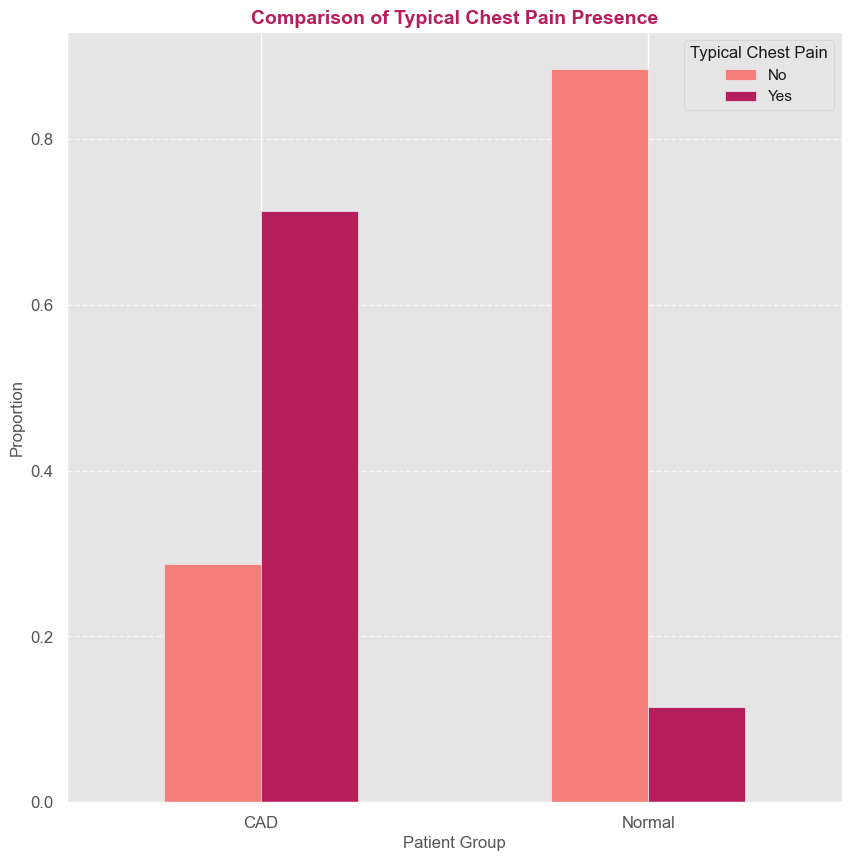

In [65]:

# Count values for both CAD and Normal patients
cad_counts = cad['Typical_Chest_Pain'].value_counts(normalize=True)
none_counts = none['Typical_Chest_Pain'].value_counts(normalize=True)

# Creating DataFrame for Seaborn
typical_pain_df = pd.DataFrame({'CAD': cad_counts, 'Normal': none_counts}).T

# Plotting grouped bar chart
plt.figure(figsize=(8,5))
typical_pain_df.plot(kind='bar', color=['#f47e7a', '#b71f5c'])

plt.title("Comparison of Typical Chest Pain Presence", fontsize=14, fontweight="bold", color='#b71f5c')
plt.xlabel("Patient Group", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Typical Chest Pain", labels=["No", "Yes"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("Typical Chest Pain.png", dpi=300)
plt.show()


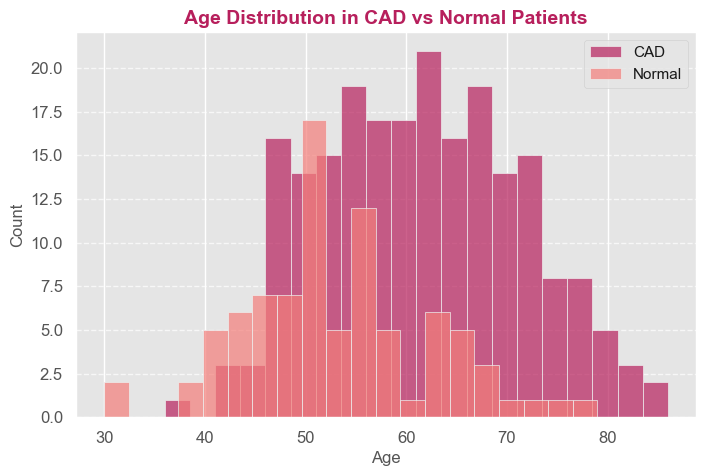

In [66]:
plt.figure(figsize=(8,5))
sns.histplot(cad['Age'], bins=20, color='#b71f5c', alpha=0.7, label='CAD')
sns.histplot(none['Age'], bins=20, color='#f47e7a', alpha=0.7, label='Normal')
plt.title("Age Distribution in CAD vs Normal Patients", fontsize=14, fontweight="bold", color='#b71f5c')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("Age.png", dpi=300)
plt.show()


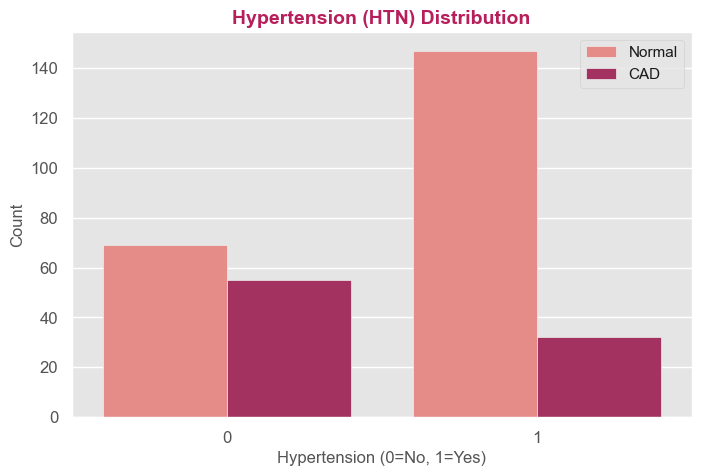

In [67]:
plt.figure(figsize=(8,5))
sns.countplot(x='HTN', hue='Cath', data=df2, palette=['#f47e7a', '#b71f5c'])
plt.title("Hypertension (HTN) Distribution", fontsize=14, fontweight="bold", color='#b71f5c')
plt.xlabel("Hypertension (0=No, 1=Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["Normal", "CAD"])
plt.savefig("HTN.png", dpi=300)
plt.show()


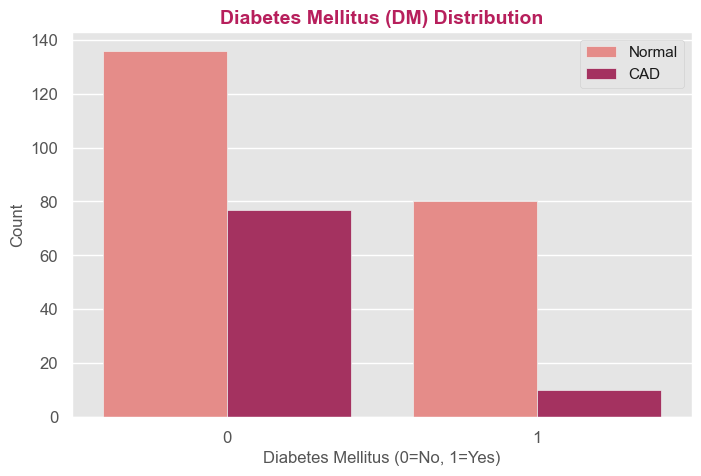

In [68]:
plt.figure(figsize=(8,5))
sns.countplot(x='DM', hue='Cath',data=df,palette=['#f47e7a', '#b71f5c'])
plt.title("Diabetes Mellitus (DM) Distribution", fontsize=14, fontweight="bold", color='#b71f5c')
plt.xlabel("Diabetes Mellitus (0=No, 1=Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["Normal", "CAD"])
plt.savefig("DM.png", dpi=300)
plt.show()


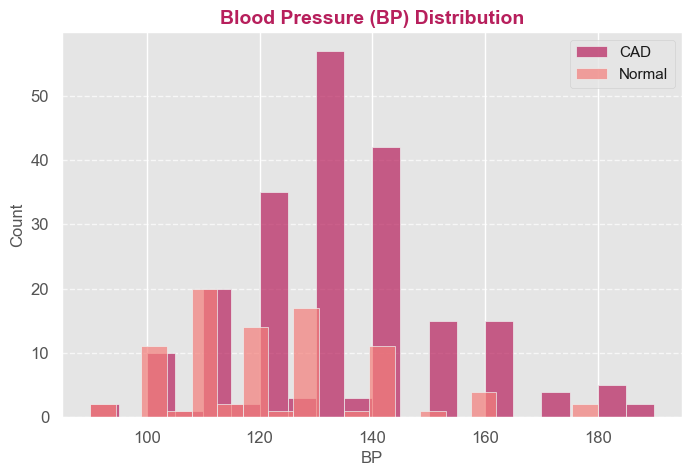

In [69]:
plt.figure(figsize=(8,5))
sns.histplot(cad['BP'], bins=20, color='#b71f5c', alpha=0.7, label='CAD')
sns.histplot(none['BP'], bins=20, color='#f47e7a', alpha=0.7, label='Normal')
plt.title("Blood Pressure (BP) Distribution", fontsize=14, fontweight="bold", color='#b71f5c')
plt.xlabel("BP", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("BP.png", dpi=300)
plt.show()


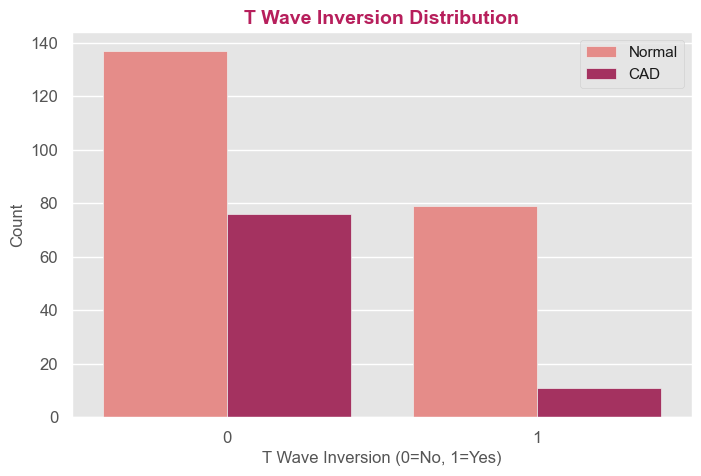

In [70]:
plt.figure(figsize=(8,5))
sns.countplot(x='Tinversion', hue='Cath', data=df, palette=['#f47e7a', '#b71f5c'])
plt.title("T Wave Inversion Distribution", fontsize=14, fontweight="bold", color='#b71f5c')
plt.xlabel("T Wave Inversion (0=No, 1=Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["Normal", "CAD"])
plt.savefig("Twave.png", dpi=300)
plt.show()


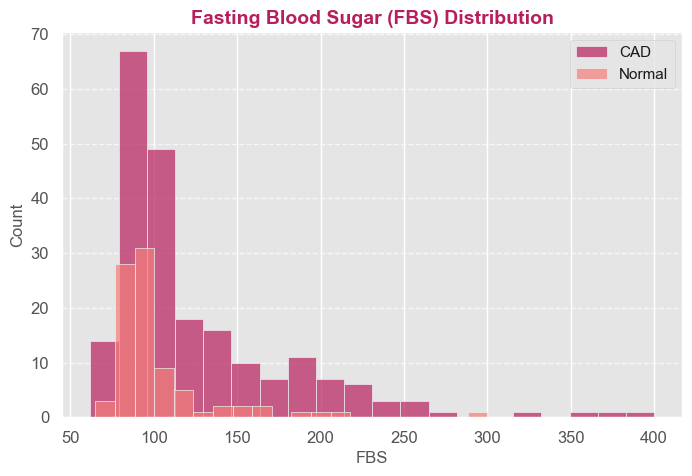

In [71]:
plt.figure(figsize=(8,5))
sns.histplot(cad['FBS'], bins=20, color='#b71f5c', alpha=0.7, label='CAD')
sns.histplot(none['FBS'], bins=20, color='#f47e7a', alpha=0.7, label='Normal')
plt.title("Fasting Blood Sugar (FBS) Distribution", fontsize=14, fontweight="bold", color='#b71f5c')
plt.xlabel("FBS", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("FBS.png", dpi=300)
plt.show()


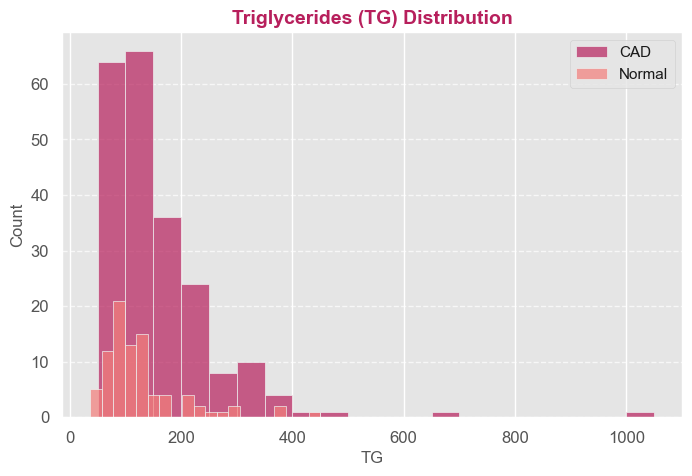

In [72]:
plt.figure(figsize=(8,5))
sns.histplot(cad['TG'], bins=20, color='#b71f5c', alpha=0.7, label='CAD')
sns.histplot(none['TG'], bins=20, color='#f47e7a', alpha=0.7, label='Normal')
plt.title("Triglycerides (TG) Distribution", fontsize=14, fontweight="bold", color='#b71f5c')
plt.xlabel("TG", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("TG.png", dpi=300)
plt.show()


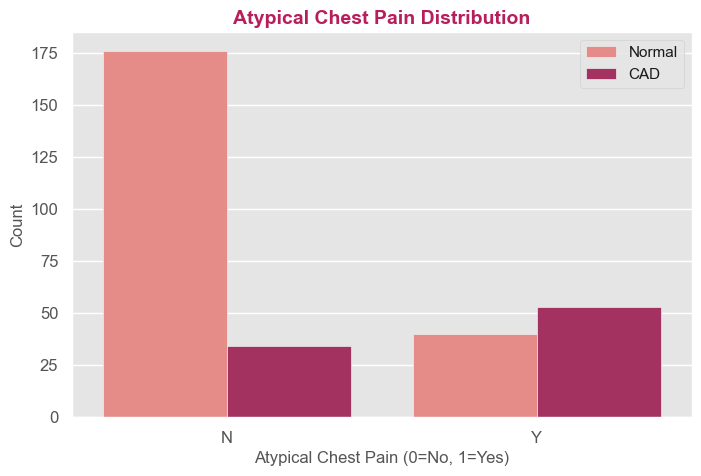

In [73]:
plt.figure(figsize=(8,5))
sns.countplot(x='Atypical', hue='Cath', data=df, palette=['#f47e7a', '#b71f5c'])
plt.title("Atypical Chest Pain Distribution", fontsize=14, fontweight="bold", color='#b71f5c')
plt.xlabel("Atypical Chest Pain (0=No, 1=Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["Normal", "CAD"])
plt.savefig("Atypical Chest pain.png", dpi=300)
plt.show()


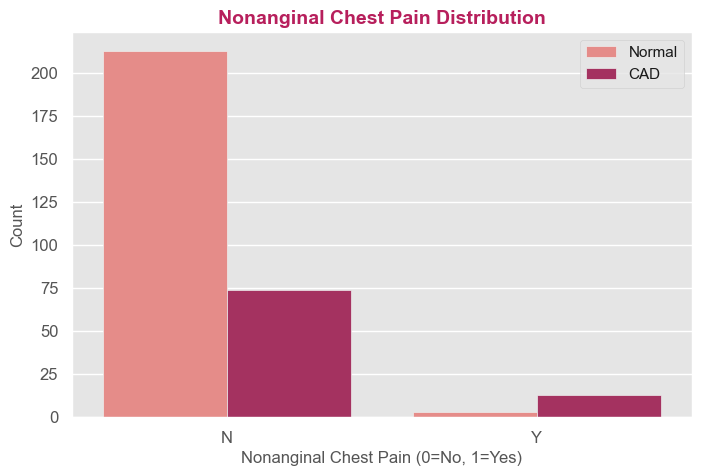

In [74]:
plt.figure(figsize=(8,5))
sns.countplot(x='Nonanginal', hue='Cath', data=df, palette=['#f47e7a', '#b71f5c'])
plt.title("Nonanginal Chest Pain Distribution", fontsize=14, fontweight="bold", color='#b71f5c')
plt.xlabel("Nonanginal Chest Pain (0=No, 1=Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["Normal", "CAD"])
plt.savefig("Nonanginal chest pain.png", dpi=300)
plt.show()


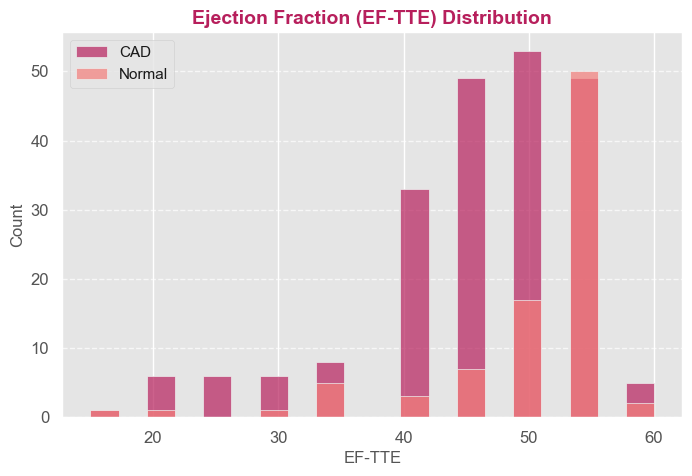

In [75]:
plt.figure(figsize=(8,5))
sns.histplot(cad['EF-TTE'], bins=20, color='#b71f5c', alpha=0.7, label='CAD')
sns.histplot(none['EF-TTE'], bins=20, color='#f47e7a', alpha=0.7, label='Normal')
plt.title("Ejection Fraction (EF-TTE) Distribution", fontsize=14, fontweight="bold", color='#b71f5c')
plt.xlabel("EF-TTE", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("ef-tte.png", dpi=300)
plt.show()


In [76]:
df['Atypical'] = df['Atypical'].astype('category')
df['Atypical'] = df['Atypical'].cat.rename_categories({'N': 0, 'Y': 1})
df['Nonanginal'] = df['Nonanginal'].astype('category')
df['Nonanginal'] = df['Nonanginal'].cat.rename_categories({'N': 0, 'Y': 1})

In [77]:
df2 = df[['Typical_Chest_Pain','Age','HTN','DM','BP', 'Tinversion','FBS','TG','Atypical', 'Nonanginal','EF-TTE','Cath']]
df2.head()

,Typical_Chest_Pain,Age,HTN,DM,BP,Tinversion,FBS,TG,Atypical,Nonanginal,EF-TTE,Cath
0,0,53,1,0,110,1,90,250,0,0,50,Cad
1,1,67,1,0,140,1,80,309,0,0,40,Cad
2,1,54,0,0,100,0,85,103,0,0,40,Cad
3,0,66,1,0,100,0,78,63,0,1,55,Normal
4,0,50,1,0,110,0,104,170,0,0,50,Normal


In [78]:
df2['Atypical'] = df2['Atypical'].astype('int')
df2['Nonanginal'] = df2['Nonanginal'].astype('int')

C:\Users\USER\AppData\Local\Temp\ipykernel_10180\1933986165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Atypical'] = df2['Atypical'].astype('int')
C:\Users\USER\AppData\Local\Temp\ipykernel_10180\1933986165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Nonanginal'] = df2['Nonanginal'].astype('int')


In [79]:
map_label = {'Cad':1,
             'Normal':0}
df2['Cath'] = df2['Cath'].map(map_label)

C:\Users\USER\AppData\Local\Temp\ipykernel_10180\4070322982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cath'] = df2['Cath'].map(map_label)


In [80]:
df2.head()

,Typical_Chest_Pain,Age,HTN,DM,BP,Tinversion,FBS,TG,Atypical,Nonanginal,EF-TTE,Cath
0,0,53,1,0,110,1,90,250,0,0,50,1
1,1,67,1,0,140,1,80,309,0,0,40,1
2,1,54,0,0,100,0,85,103,0,0,40,1
3,0,66,1,0,100,0,78,63,0,1,55,0
4,0,50,1,0,110,0,104,170,0,0,50,0


In [81]:
from sklearn.preprocessing import QuantileTransformer
QT=QuantileTransformer(n_quantiles=303,output_distribution='normal')
df2[['TG']] = QT.fit_transform(df2[['TG']])

C:\Users\USER\AppData\Local\Temp\ipykernel_10180\2319155477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['TG']] = QT.fit_transform(df2[['TG']])


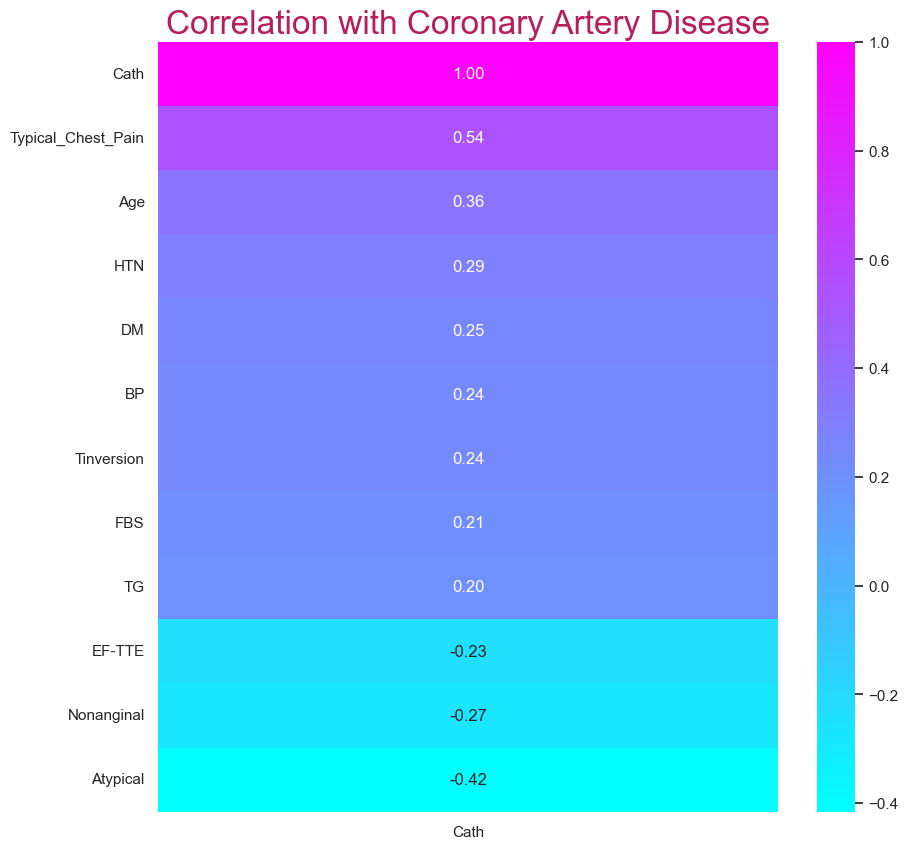

In [82]:
cad_corr = df2.corr()
cad_to_corr = cad_corr['Cath'].sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.0)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(cad_to_corr.to_frame(), cmap=plt.cm.cool, annot=True, fmt='.2f')
plt.title("Correlation with Coronary Artery Disease", fontsize=24,color='#b71f5c')
plt.savefig("correlation_matrix.png", dpi=300)
plt.show();

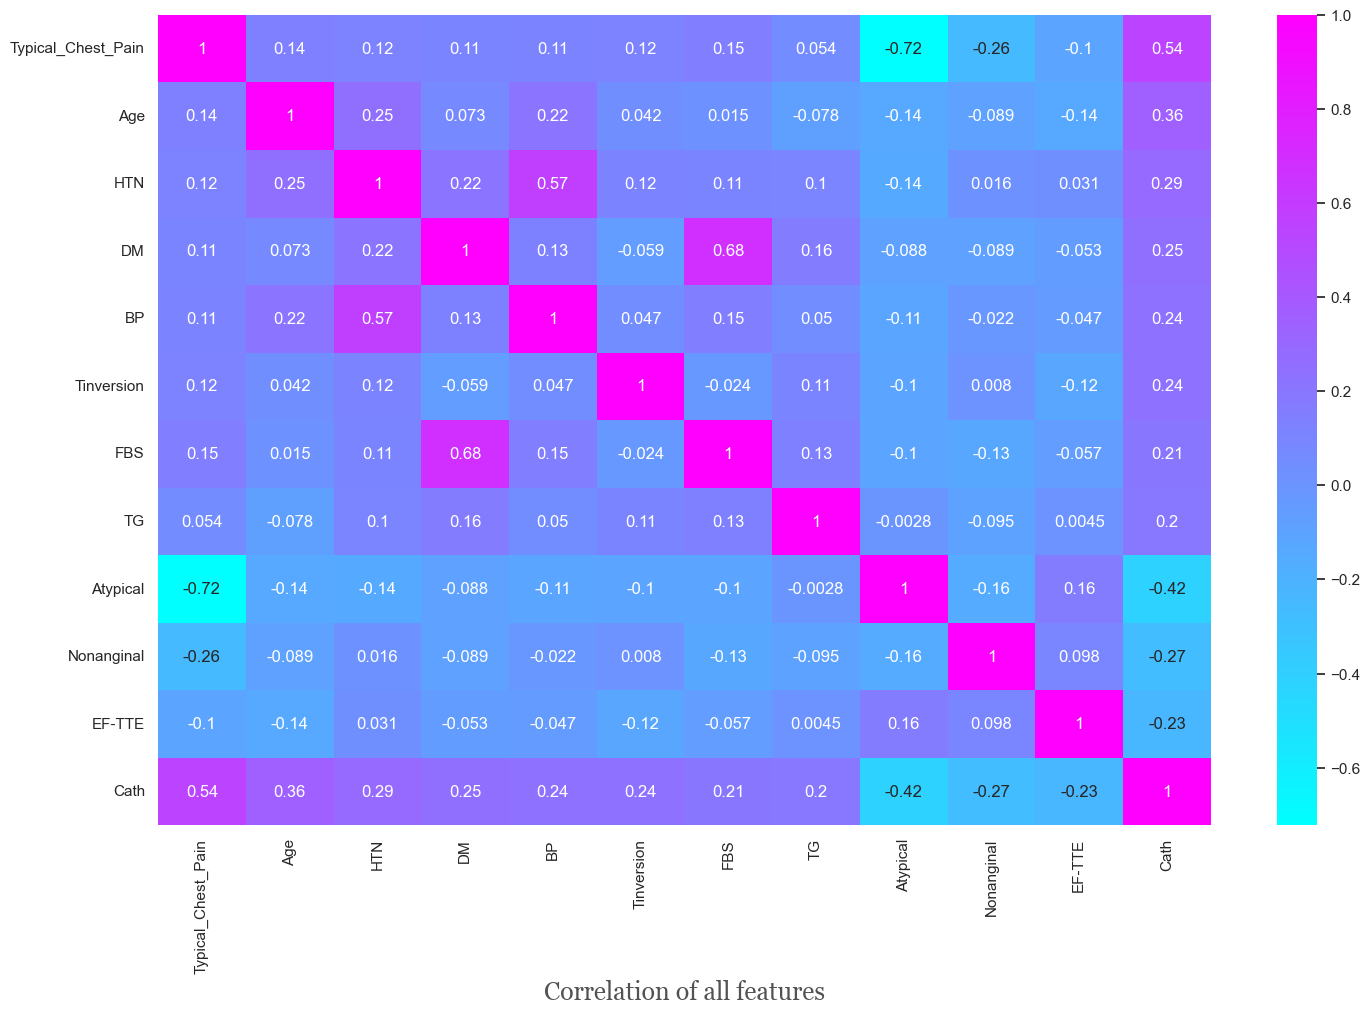

In [83]:
figure = plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True,cmap=plt.cm.cool)
plt.tight_layout()
plt.xlabel('Correlation of all features',fontsize=18,color=font_color, **csfont)
plt.savefig("22correlation_matrix.png", dpi=300)
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df2.drop('Cath', axis = 1)


y = df2['Cath']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_test.columns)

In [85]:
print(X)

     Typical_Chest_Pain  Age  HTN  DM   BP  Tinversion  FBS        TG  \
0                     0   53    1   0  110           1   90  1.294872   
1                     1   67    1   0  140           1   80  1.664430   
2                     1   54    0   0  100           0   85 -0.325196   
3                     0   66    1   0  100           0   78 -1.793784   
4                     0   50    1   0  110           0  104  0.583432   
..                  ...  ...  ...  ..  ...         ...  ...       ...   
298                   1   58    0   0  100           0   92 -0.158361   
299                   0   55    0   0  100           0   86 -0.187851   
300                   0   48    1   0  130           0   83 -0.628309   
301                   0   57    0   1  100           0   96 -0.058133   
302                   1   56    1   0  120           1   78  0.204774   

     Atypical  Nonanginal  EF-TTE  
0           0           0      50  
1           0           0      40  
2           0  

In [86]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

In [89]:
skf = StratifiedKFold(n_splits = 5,
                      shuffle = True,
                      random_state = 123)

In [90]:
#Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=34, max_depth=30,random_state=42)

rfc.fit(X_train_sc,y_train)
pred = rfc.predict(X_test_sc)
print(classification_report(y_test, pred, target_names=['normal','coronary artery disease']))

                         precision    recall  f1-score   support

                 normal       1.00      0.50      0.67         8
coronary artery disease       0.85      1.00      0.92        23

               accuracy                           0.87        31
              macro avg       0.93      0.75      0.79        31
           weighted avg       0.89      0.87      0.85        31



In [92]:
#Training accuracy
rfc.fit(X_train_sc,y_train)
pred = rfc.predict(X_train_sc)
print(classification_report(y_train, pred, target_names=['normal','coronary artery disease']))

                         precision    recall  f1-score   support

                 normal       1.00      1.00      1.00        79
coronary artery disease       1.00      1.00      1.00       193

               accuracy                           1.00       272
              macro avg       1.00      1.00      1.00       272
           weighted avg       1.00      1.00      1.00       272



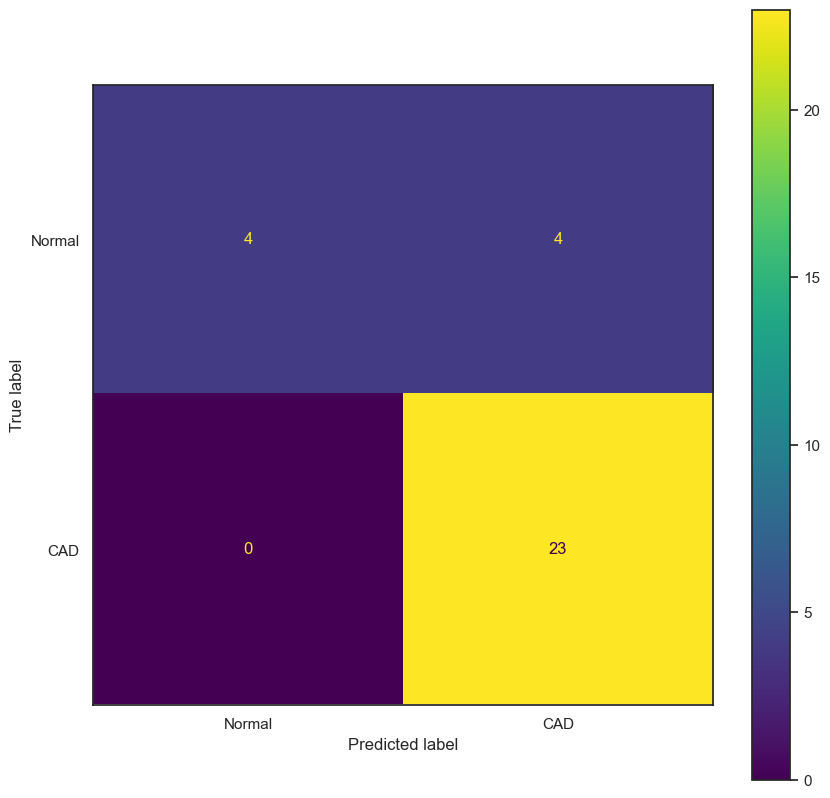

In [93]:
# After fitting the model (e.g., rfc or lr)
pred = rfc.predict(X_test_sc)  # Ensure prediction is made on the test set
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "CAD"])
disp.plot()
plt.savefig("random_confusion_matrix.png", dpi=300)
plt.show()


In [94]:
#1st row
# Example: Single input row (replace with actual values)
sample_input = [[0,53,1,0,110,1,90,250,0,0,50]]  # Replace with the actual feature values

# Scale the input using the previously fitted StandardScaler
sample_input_sc = sc.transform(sample_input)  # Use the same scaler object (sc) as before

# Predict using the trained RandomForestClassifier model
prediction = rfc.predict(sample_input_sc)

# Map prediction to human-readable output
output = "Coronary Artery Disease (CAD)" if prediction[0] == 1 else "Normal"

print("Prediction:", output)
print(prediction)


Prediction: Coronary Artery Disease (CAD)
[1]


C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [95]:
#Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
lr = GridSearchCV(LogisticRegression(penalty='l2', random_state = 123), param_grid,  cv = skf, scoring='accuracy')
lr.fit(X_train_sc,y_train)
predict = lr.predict(X_test_sc)

In [97]:
report = print(classification_report(y_test, predict, target_names=['normal','coronary artery disease']))
report

                         precision    recall  f1-score   support

                 normal       1.00      0.75      0.86         8
coronary artery disease       0.92      1.00      0.96        23

               accuracy                           0.94        31
              macro avg       0.96      0.88      0.91        31
           weighted avg       0.94      0.94      0.93        31



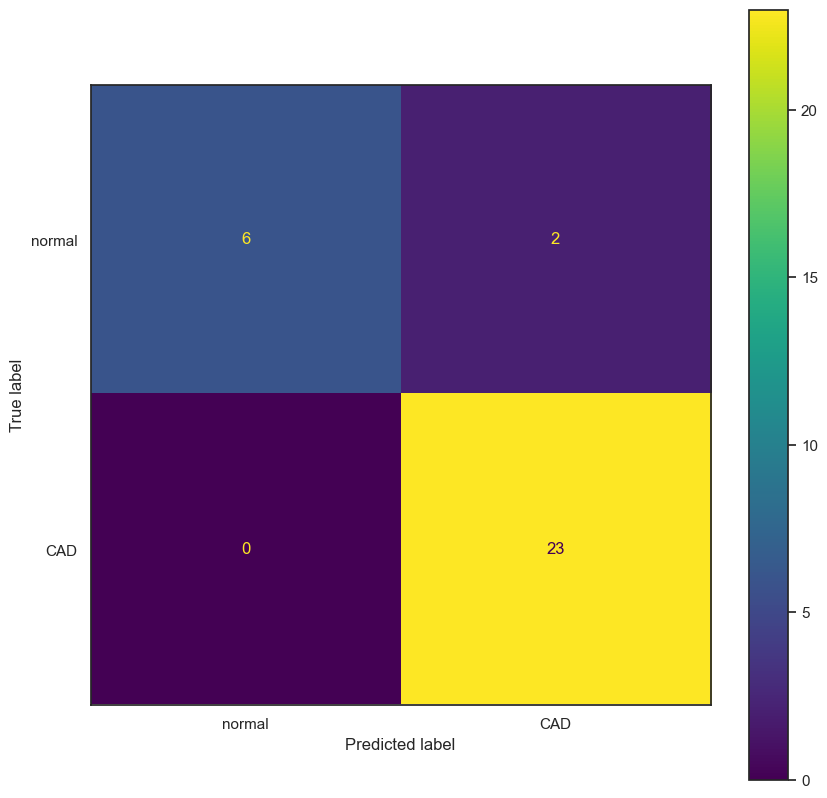

In [98]:
predict = lr.predict(X_test_sc)
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["normal","CAD"])
disp.plot()
plt.savefig("logistic_confusion_matrix.png", dpi=300)
plt.show()

In [99]:
#Training accuracy
lr.fit(X_train_sc,y_train)
predict = lr.predict(X_train_sc)
report = print(classification_report(y_train, predict, target_names=['normal','coronary artery disease']))
report

                         precision    recall  f1-score   support

                 normal       0.81      0.76      0.78        79
coronary artery disease       0.90      0.93      0.92       193

               accuracy                           0.88       272
              macro avg       0.86      0.84      0.85       272
           weighted avg       0.88      0.88      0.88       272



In [100]:
#6th row
# Example: Single input row (replace with actual values)
sample_input = [[0,66,1,0,100,0,78,63,0,1,55]]  # Replace with the actual feature values

# Scale the input using the previously fitted StandardScaler
sample_input_sc = sc.transform(sample_input)  # Use the same scaler object (sc) as before

# Predict using the trained RandomForestClassifier model
prediction = rfc.predict(sample_input_sc)

# Map prediction to human-readable output
output = "Coronary Artery Disease (CAD)" if prediction[0] == 1 else "Normal"

print("Prediction:", output)
print(prediction)


Prediction: Normal
[0]


C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [101]:
#AdaBoost Classifier

In [102]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=5),n_estimators=200,learning_rate=0.06, random_state=42)
ada_clf.fit(X_train_sc,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=5),
                   learning_rate=0.06, n_estimators=200, random_state=42)

In [103]:
ada_pred = ada_clf.predict(X_test_sc)
print(classification_report(y_test, ada_pred,  target_names=['normal','coronary artery disease']))

                         precision    recall  f1-score   support

                 normal       1.00      0.62      0.77         8
coronary artery disease       0.88      1.00      0.94        23

               accuracy                           0.90        31
              macro avg       0.94      0.81      0.85        31
           weighted avg       0.91      0.90      0.90        31



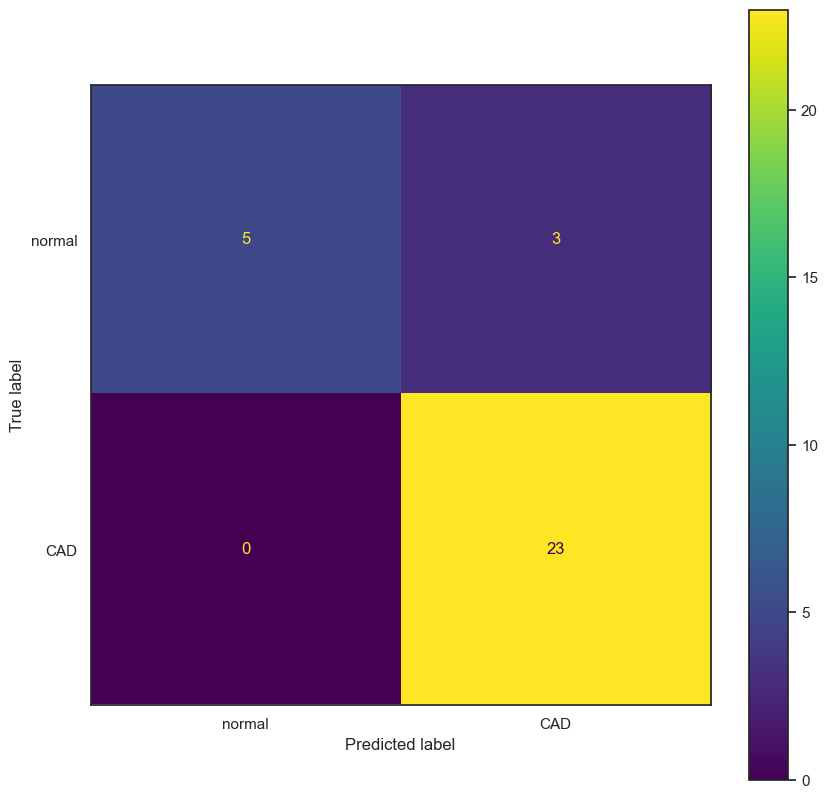

In [104]:
ada_pred = ada_clf.predict(X_test_sc)
cm = confusion_matrix(y_test, ada_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["normal","CAD"])
disp.plot()
plt.savefig("adaboost_confusion_matrix.png", dpi=300)
plt.show()

In [105]:
#Training Accuracy
ada_clf.fit(X_train_sc,y_train)
ada_pred = ada_clf.predict(X_train_sc)
print(classification_report(y_train, ada_pred,  target_names=['normal','coronary artery disease']))

                         precision    recall  f1-score   support

                 normal       1.00      1.00      1.00        79
coronary artery disease       1.00      1.00      1.00       193

               accuracy                           1.00       272
              macro avg       1.00      1.00      1.00       272
           weighted avg       1.00      1.00      1.00       272



In [55]:
#69th row
# Example: Single input row (replace with actual values)
sample_input = [[1,30,1,0,140,0,92,290,0,0,55]]  # Replace with the actual feature values

# Scale the input using the previously fitted StandardScaler
sample_input_sc = sc.transform(sample_input)  # Use the same scaler object (sc) as before

# Predict using the trained RandomForestClassifier model
prediction = rfc.predict(sample_input_sc)

# Map prediction to human-readable output
output = "Coronary Artery Disease (CAD)" if prediction[0] == 1 else "Normal"

print("Prediction:", output)
print(prediction)


Prediction: Normal
[0]


C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [124]:
import pickle

# Save Random Forest model
with open('random_forest.pkl', 'wb') as f:
    pickle.dump(rfc, f)

# Save Logistic Regression model
with open('logistic_regression.pkl', 'wb') as f:
    pickle.dump(lr, f)

# Save AdaBoost model
with open('adaboost.pkl', 'wb') as f:
    pickle.dump(ada_clf, f)


    

print("Models saved successfully!")


Models saved successfully!


In [125]:
with open('quantile_transformer.pkl', 'wb') as f:
    pickle.dump(QT, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

    
    print("Saved successfully!")

Saved successfully!


In [126]:
import os
print(os.getcwd())

C:\Users\USER


In [127]:
print(df2['TG'].min(), df2['TG'].max())


-5.199337582605575 5.19933758270342
